<a href="https://colab.research.google.com/github/MAHMUD722025/Health-Cost-calculator--Linear-regession/blob/main/HEALTH_COST_CALCULATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/patients_1000.xlsx")
df = df.drop('Gender',axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt



df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

features = df.drop('expenses', axis=1)
labels = df['expenses']

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(train_features, train_labels)

test_predictions = model.predict(test_features)
print(f"Prediction:{test_predictions}")

mae = mean_absolute_error(test_labels, test_predictions)
print(f"Mean Absolute Error (MAE): ${mae:.2f}")

r2 = r2_score(test_labels, test_predictions)
print(f"R-squared Score (R2): {r2:.2f}")

Prediction:[19156.38712655 24180.08008413 20965.40125363 23701.03059405
 15747.40296748 19216.67968183 25372.01948026 26620.23896409
 19492.73016358 25118.75908559 24304.70404767 20643.12823853
 22789.15414724 17191.26526908 26881.55067932 15930.31325251
 21470.58455378 22774.41538072 14426.15839563 20642.45949393
 28318.03040496 27262.77876052 20483.67678517 21597.21475111
 30090.85316763 16854.92223205 18989.55309722 22637.72762904
 20251.84260299 19709.79919383 15046.57684956 14300.86568749
 16801.98586733 27051.05968703 20905.77744295 29231.24434096
 18091.74667235 18496.43358522 23915.42464592 22874.91176799
 23686.29182752 23818.27198163 22574.09135078 24570.69697507
 23954.95973331 26815.21303727 24217.60893773 26854.74812466
 27893.9235134  18118.54922701 21540.26591881 19573.80657216
 21834.39889006 17124.92762703 26393.78112408 26663.11777447
 18061.60039471 17330.62799915 16294.7963334  21986.49415287
 23001.54196532 20265.91262491 28558.5582669  27053.73466541
 25203.847961

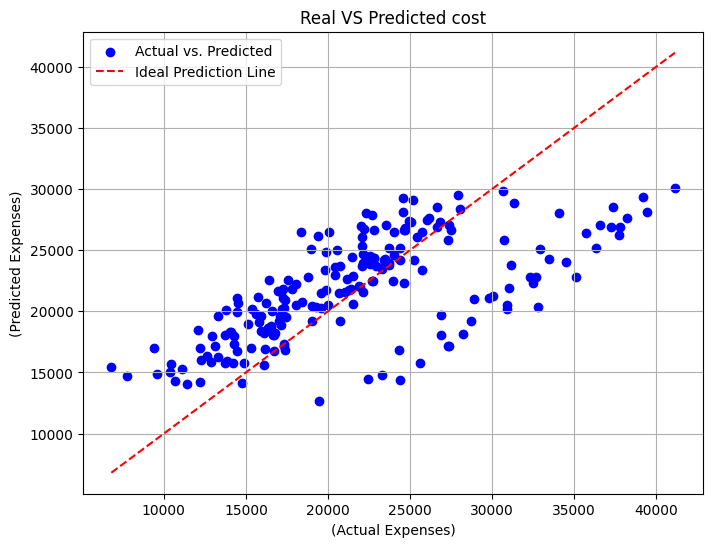

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(test_labels, test_predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel("(Actual Expenses)")
plt.ylabel("(Predicted Expenses)")
plt.title("Real VS Predicted cost")
plt.legend()
plt.grid(True)
plt.show()